In [103]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Use panda’s read_csv() function to import the data from github and create a new DataFrame named bsrn

data_url = "https://raw.githubusercontent.com/environmental-data-science" \
            "/eds217_2023/main/data/BSRN_GOB_2019-10.csv"
    

In [51]:
#Practice 1 
data_url = "https://raw.githubusercontent.com/environmental-data-science/eds217_2023/main/data/BSRN_GOB_2019-10.csv"

bsrn = pd.read_csv(data_url)

#Convert the DATE column to datetime using the pd.to_datetime() function.
bsrn['DATE'] = pd.to_datetime(bsrn.DATE)

#Set the DATE column as the index of the DataFrame using the set_index() method.
#bsrn.set_index('DATE', inplace=True)

In [52]:
#Print a list of your DataFrame’s column names.
bsrn.head()
#How many values are there in the entire DataFrame?
bsrn.info()
#What is the data type of the first column?
type(bsrn[:1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44640 entries, 0 to 44639
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     44640 non-null  datetime64[ns]
 1   H_m      44640 non-null  int64         
 2   SWD_Wm2  44630 non-null  float64       
 3   STD_SWD  44637 non-null  float64       
 4   DIR_Wm2  44623 non-null  float64       
 5   STD_DIR  44623 non-null  float64       
 6   DIF_Wm2  44632 non-null  float64       
 7   STD_DIF  44632 non-null  float64       
 8   LWD_Wm2  44589 non-null  float64       
 9   STD_LWD  44637 non-null  float64       
 10  SWU_Wm2  44640 non-null  int64         
 11  LWU_Wm2  44640 non-null  int64         
 12  T_degC   44640 non-null  float64       
 13  RH       44640 non-null  float64       
 14  P_hPa    44640 non-null  int64         
dtypes: datetime64[ns](1), float64(10), int64(4)
memory usage: 5.1 MB


pandas.core.frame.DataFrame

In [53]:
bsrn.head()

,DATE,H_m,SWD_Wm2,STD_SWD,DIR_Wm2,STD_DIR,DIF_Wm2,STD_DIF,LWD_Wm2,STD_LWD,SWU_Wm2,LWU_Wm2,T_degC,RH,P_hPa
0,2019-10-01 00:00:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.2,30.7,966
1,2019-10-01 00:01:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.3,0,383,16.4,30.7,966
2,2019-10-01 00:02:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.2,0,383,16.5,30.5,966
3,2019-10-01 00:03:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.5,30.4,966
4,2019-10-01 00:04:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.8,30.5,966


In [54]:
#Create a new DataFrame containing the first record for each day and the following columns: 
#the timestamp of the record, incoming shortwave radiation, direct and diffuse radiation, 
# and incoming longwave radiation. (Hint: the BSRN station collects data every minute).

#bsrn_new = bsrn[ #take a dataframe
  #  bsrn['DATE'] == "00:00:00"  # find the rows where this is true
  # ][['DATE', 'SWD_Wm2', 'DIF_Wm2']]

first_record_each_day = bsrn.groupby(bsrn['DATE'].dt.date).first()
bsrn_columns = ['SWD_Wm2', 'DIR_Wm2', 'DIF_Wm2', 'LWD_Wm2']

#bsrn_new = bsrn[(bsrn.index.hour = 0) & (bsrn.index.minute = 0)]
#temp_hourly = bsrn[bsrn.index.minute == 0]
# Create a new DataFrame with the selected columns
bsrn_new = first_record_each_day[bsrn_columns]
print(bsrn_new)


            SWD_Wm2  DIR_Wm2  DIF_Wm2  LWD_Wm2
DATE                                          
2019-10-01     -3.0      0.0     -3.0    300.0
2019-10-02     -2.0      0.0     -2.0    306.0
2019-10-03     -2.0      0.0     -2.0    293.0
2019-10-04     -3.0      0.0     -3.0    287.0
2019-10-05     -2.0      0.0     -2.0    305.0
2019-10-06     -3.0      0.0     -3.0    294.0
2019-10-07     -3.0      0.0     -3.0    277.0
2019-10-08     -2.0      0.0     -3.0    292.0
2019-10-09     -2.0      0.0     -2.0    294.0
2019-10-10     -2.0      0.0     -2.0    317.0
2019-10-11     -2.0      0.0     -2.0    318.0
2019-10-12     -2.0      0.0     -2.0    341.0
2019-10-13     -3.0      0.0     -3.0    367.0
2019-10-14     -3.0      0.0     -2.0    401.0
2019-10-15     -2.0      0.0     -2.0    401.0
2019-10-16     -3.0      0.0     -3.0    393.0
2019-10-17     -2.0      0.0     -2.0    339.0
2019-10-18     -2.0      0.0     -2.0    355.0
2019-10-19     -2.0      0.0     -2.0    385.0
2019-10-20   

In [55]:

#Create a new Series containing the temperature values every hour at the top of the hour.
first_record_each_day = bsrn.groupby(bsrn['DATE'].dt.date).first()
bsrn_columns = ['T_degC']
bsrn_new = first_record_each_day[bsrn_columns]
bsrn_temp = bsrn_new['T_degC'].squeeze()
print(bsrn_temp)


DATE
2019-10-01    16.2
2019-10-02    19.1
2019-10-03    13.0
2019-10-04    13.3
2019-10-05    14.7
2019-10-06    12.2
2019-10-07    12.7
2019-10-08    14.3
2019-10-09    12.4
2019-10-10    14.5
2019-10-11    14.4
2019-10-12    17.7
2019-10-13    24.3
2019-10-14    22.6
2019-10-15    23.1
2019-10-16    30.6
2019-10-17    18.3
2019-10-18    21.0
2019-10-19    14.7
2019-10-20    17.1
2019-10-21    22.8
2019-10-22    19.9
2019-10-23    13.2
2019-10-24    13.2
2019-10-25    16.9
2019-10-26    16.0
2019-10-27    17.7
2019-10-28    13.1
2019-10-29    12.4
2019-10-30    16.1
2019-10-31    16.1
Name: T_degC, dtype: float64


In [56]:
#Calculate the mean incoming shortwave, outgoing shortwave, incoming longwave, and outgoing longwave radiation over the entire month.
bsrn[ #take a dataframe
    ['SWD_Wm2', 'DIR_Wm2', 'DIF_Wm2', 'LWD_Wm2'] #give me this part of it
     ].mean() #we can take the mean of the part we grabbed

SWD_Wm2    318.046516
DIR_Wm2    348.581987
DIF_Wm2     65.294542
LWD_Wm2    342.350692
dtype: float64

In [57]:
#Practice 5

#Add a column ‘NET_SW’ to bsrn with the net shortwave radiation.
bsrn['NET_SW'] = bsrn['SWD_Wm2'] - bsrn['SWU_Wm2']
#Add a column ‘NET_LW’ to bsrn with the net longwave radiation.
bsrn['NET_LW'] = bsrn['LWD_Wm2'] - bsrn['LWU_Wm2']
#Add a column ‘NET_RAD’ to bsrn with the net total radiation.
bsrn['NET_RAD'] = bsrn['NET_SW'] + bsrn['NET_LW']


In [62]:
# Practice 5 d

bsrn.set_index('DATE', inplace=True)


KeyError: "None of ['DATE'] are in the columns"

In [64]:

daily_rad = []
for d in bsrn.index.day.unique():
    avg_SWD = bsrn.SWD_Wm2[bsrn.index.day == d].mean()
    avg_SWU = bsrn.SWU_Wm2[bsrn.index.day == d].mean()
    avg_LWD = bsrn.LWD_Wm2[bsrn.index.day == d].mean()
    avg_SWU = bsrn.LWU_Wm2[bsrn.index.day == d].mean()
    net_rad = bsrn.NET_RAD[bsrn.index.day == d].mean()
    # Append the current day and these two values to our list of daily radiation values:
    daily_rad.append([d, avg_SWD, avg_SWU, avg_LWD, avg_SWU, net_rad])

daily_SW = pd.DataFrame(daily_rad, columns=['day', 'SW_in', 'SW_out', 'LW_in', 'LW_out', 'Net_Rad'])
daily_SW

,day,SW_in,SW_out,LW_in,LW_out,Net_Rad
0,1,325.336345,458.834028,321.219903,458.834028,72.366295
1,2,322.732453,448.486111,318.131341,448.486111,78.402643
2,3,298.635417,429.979861,330.516667,429.979861,95.910417
3,4,323.209173,439.990972,314.129526,439.990972,83.788153
4,5,296.861806,427.359722,324.660876,427.359722,88.569840
5,6,292.118915,428.665278,330.458333,428.665278,89.634214
6,7,339.848611,439.002778,303.437413,439.002778,84.256606
7,8,332.009028,438.550000,313.126653,438.550000,89.752262
8,9,290.577083,428.110417,342.506267,428.110417,100.719359
9,10,310.887500,434.941667,331.667130,434.941667,99.003475


In [67]:
#Practice 6 
data = [
    ['Amazon', 6400, 7050000],
    ['Congo', 4371, 4014500],
    ['Yangtze', 6418, 1808500],
    ['Mississippi', 3730, 3202230]
]

# Define the column names
columns = ['River', 'Length (km)', 'Drainage area (km^2)']

# Create the DataFrame
df1 = pd.DataFrame(data, columns=columns)

#Create a dictionary of the data
data = {
    'River': ['Zambezi', 'Mekong', 'Murray', 'Rhône', 'Cubango'],
    'Length (km)': [2574, 4023, 2508, 813, 1056],
    'Drainage area (km^2)': [1331000, 811000, 1061469, 98000, 530000]
}

# Create the DataFrame
df2 = pd.DataFrame(data)
df2

#Merge the two dataframes 
frames = [df1, df2]

merged = pd.concat(frames)
merged

,River,Length (km),Drainage area (km^2)
0,Amazon,6400,7050000
1,Congo,4371,4014500
2,Yangtze,6418,1808500
3,Mississippi,3730,3202230
0,Zambezi,2574,1331000
1,Mekong,4023,811000
2,Murray,2508,1061469
3,Rhône,813,98000
4,Cubango,1056,530000


In [82]:
rivers = pd.DataFrame({'River': ['Zambezi', 'Mekong', 'Murray', 'Rhône', 'Cubango', 'Amazon', 'Congo', 'Yangtze', 'Mississippi'],
    'Length (km)': [2574, 4023, 2508, 813, 1056, 3730, 6418, 4371, 6400],
    'Drainage area (km^2)': [1331000, 811000, 1061469, 98000, 530000,7050000, 4014500, 1808500, 3202230],
    'Discharge (m^2/s)': [20000, 41200, 30166, 16792, 3400, 16000,767,1710,475],
    'Mouth': ['Atlantic Ocean', 'Atlantic Ocean', 'East China Sea', 'Gulf of Mexico', 'Indian Ocean', 'South China Sea', 'Southern Ocean', 'Mediterranean Sea', 'Okavango Delta'],
    'Source': ['Rio Mantaro', 'Lualaba River', 'Jianggendiru Glacier', 'Lake Itasca', 'Miombo Woodlands', 'Lasagongma Spring', 'Austalian Alps', 'Rhone Glacier', 'Bie Plateau'],
    'Continent': ['South America', 'Africa', 'Asia', 'North America', 'Africa', 'Asia', 'Oceania', 'Europe', 'Africa']
})
rivers

,River,Length (km),Drainage area (km^2),Discharge (m^2/s),Mouth,Source,Continent
0,Zambezi,2574,1331000,20000,Atlantic Ocean,Rio Mantaro,South America
1,Mekong,4023,811000,41200,Atlantic Ocean,Lualaba River,Africa
2,Murray,2508,1061469,30166,East China Sea,Jianggendiru Glacier,Asia
3,Rhône,813,98000,16792,Gulf of Mexico,Lake Itasca,North America
4,Cubango,1056,530000,3400,Indian Ocean,Miombo Woodlands,Africa
5,Amazon,3730,7050000,16000,South China Sea,Lasagongma Spring,Asia
6,Congo,6418,4014500,767,Southern Ocean,Austalian Alps,Oceania
7,Yangtze,4371,1808500,1710,Mediterranean Sea,Rhone Glacier,Europe
8,Mississippi,6400,3202230,475,Okavango Delta,Bie Plateau,Africa


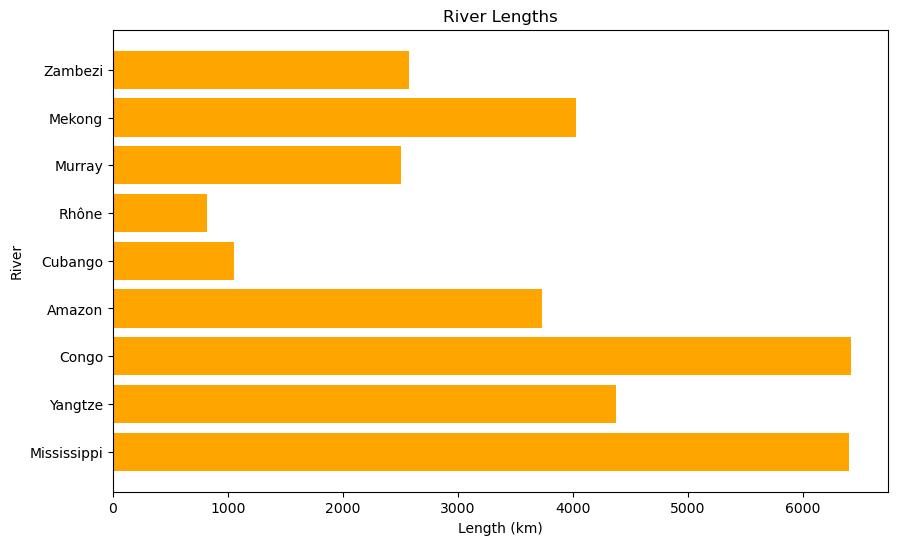

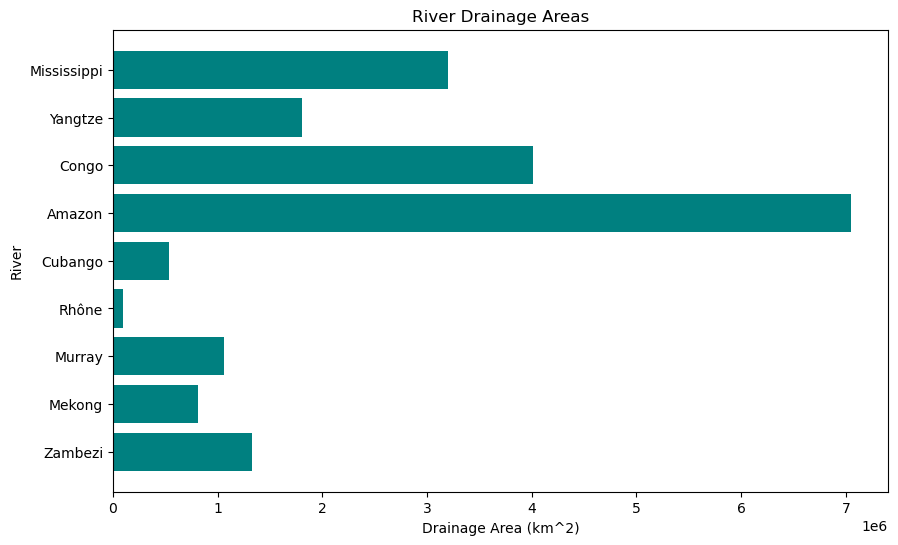

Text(0.5, 1.0, 'Rivers by Continent')

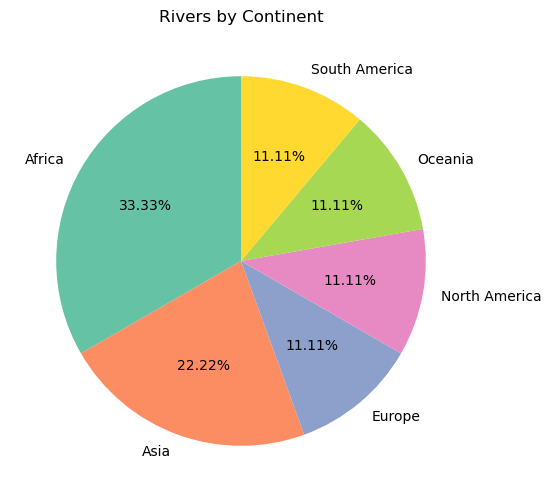

In [109]:
#Practice 7
plt.figure(figsize=(10, 6))
plt.barh(rivers['River'], rivers['Length (km)'], color='orange')
plt.xlabel('Length (km)')
plt.ylabel('River')
plt.title('River Lengths')
plt.gca().invert_yaxis()  # Invert the y-axis to have the longest river at the top
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(rivers['River'], rivers['Drainage area (km^2)'], color='teal')
plt.xlabel('Drainage Area (km^2)')
plt.ylabel('River')
plt.title('River Drainage Areas')
plt.show()

plt.figure(figsize=(10, 6))
rivers.groupby('Continent').size().plot(kind='pie', autopct='%.2f%%', colors = sns.color_palette('Set2'), startangle = 90)
plt.title('Rivers by Continent')

#plt.pie(rivers['Continent'], autopct = '%1.1f%', startangle = 90)
#plt.title('River Drainage Areas')
#plt.show()

In [86]:
#Practice 8 Export your dataframes 
#a 
rivers.to_csv('/Users/carlycaswell/Documents/MEDS/Summer_Q1/EDS_217_Python/github/eds217_2023/eds217_2023/rivers.csv')

#b
bsrn.to_csv('/Users/carlycaswell/Documents/MEDS/Summer_Q1/EDS_217_Python/github/eds217_2023/eds217_2023/bsrn.csv')